In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r'C:\Users\Ramandeep\Desktop\archive\winequalityN.csv')

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data=data.drop(columns=['type'],axis=1)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data['fixed acidity']=data['fixed acidity'].fillna(method='pad')
data['volatile acidity']=data['volatile acidity'].fillna(method='pad')
data['citric acid']=data['citric acid'].fillna(method='pad')
data['residual sugar']=data['residual sugar'].fillna(method='pad')
data['chlorides']=data['chlorides'].fillna(method='pad')
data['pH']=data['pH'].fillna(method='pad')
data['sulphates']=data['sulphates'].fillna(method='pad')

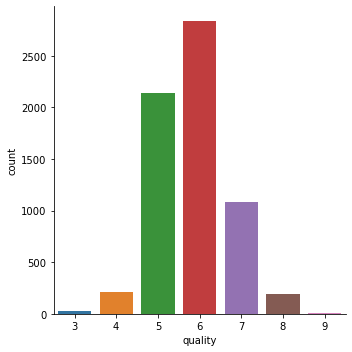

In [9]:
sns.catplot(x='quality', data=data,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

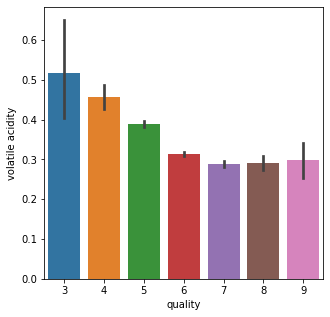

In [10]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

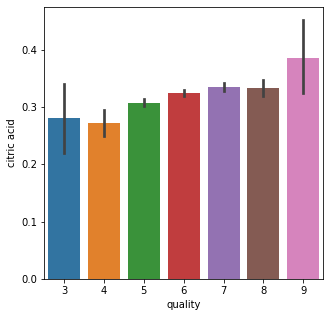

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=data)

In [12]:
correlation =data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219366,0.323896,-0.112557,0.298277,-0.283065,-0.329627,0.458723,-0.251858,0.299921,-0.095513,-0.076833
volatile acidity,0.219366,1.000000,-0.377743,-0.195953,0.377234,-0.352402,-0.414417,0.271351,0.260505,0.225593,-0.038114,-0.265774
citric acid,0.323896,-0.377743,1.000000,0.142457,0.039127,0.133311,0.195208,0.096320,-0.328909,0.056594,-0.010441,0.085537
residual sugar,-0.112557,-0.195953,0.142457,1.000000,-0.128939,0.402809,0.495427,0.552520,-0.266696,-0.185656,-0.359420,-0.037016
chlorides,0.298277,0.377234,0.039127,-0.128939,1.000000,-0.194966,-0.279583,0.362592,0.045455,0.395802,-0.256882,-0.200625
free sulfur dioxide,-0.283065,-0.352402,0.133311,0.402809,-0.194966,1.000000,0.720934,0.025717,-0.145394,-0.188643,-0.179838,0.055463
total sulfur dioxide,-0.329627,-0.414417,0.195208,0.495427,-0.279583,0.720934,1.000000,0.032395,-0.237967,-0.275733,-0.265740,-0.041385
density,0.458723,0.271351,0.096320,0.552520,0.362592,0.025717,0.032395,1.000000,0.012184,0.259672,-0.686745,-0.305858
pH,-0.251858,0.260505,-0.328909,-0.266696,0.045455,-0.145394,-0.237967,0.012184,1.000000,0.191704,0.120677,0.019143
sulphates,0.299921,0.225593,0.056594,-0.185656,0.395802,-0.188643,-0.275733,0.259672,0.191704,1.000000,-0.003138,0.037955


<AxesSubplot:>

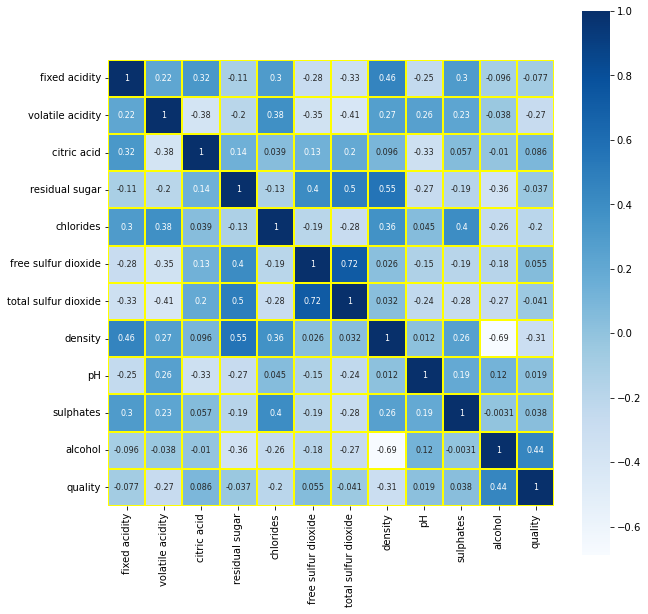

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues',linewidths=2,linecolor="yellow")

In [15]:
X=data.drop('quality',axis=1)

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.58,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [18]:
Y=data['quality'].apply(lambda Y_value:1 if Y_value>=7  else 0)

In [32]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(Y.shape,Y_train.shape,Y_test.shape)

(6497,) (5197,) (1300,)


In [23]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
799,6.0,0.180,0.31,1.40,0.036,14.0,75.0,0.99085,3.34,0.58,11.1
1153,5.3,0.395,0.07,1.30,0.035,26.0,102.0,0.99200,3.50,0.35,10.6
4915,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3
2602,6.4,0.220,0.34,1.40,0.023,56.0,115.0,0.98958,3.18,0.70,11.7
5267,9.4,0.270,0.53,2.40,0.074,6.0,18.0,0.99620,3.20,1.13,12.0
...,...,...,...,...,...,...,...,...,...,...,...
4043,7.4,0.160,0.27,15.50,0.050,25.0,135.0,0.99840,2.90,0.43,8.7
4883,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.5
1525,7.2,0.270,0.74,12.50,0.037,47.0,156.0,0.99810,3.04,0.44,8.7
5109,8.0,0.725,0.24,2.80,0.083,10.0,62.0,0.99685,3.35,0.56,10.0


In [24]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
799,6.0,0.180,0.31,1.40,0.036,14.0,75.0,0.99085,3.34,0.58,11.1
1153,5.3,0.395,0.07,1.30,0.035,26.0,102.0,0.99200,3.50,0.35,10.6
4915,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3
2602,6.4,0.220,0.34,1.40,0.023,56.0,115.0,0.98958,3.18,0.70,11.7
5267,9.4,0.270,0.53,2.40,0.074,6.0,18.0,0.99620,3.20,1.13,12.0
...,...,...,...,...,...,...,...,...,...,...,...
4043,7.4,0.160,0.27,15.50,0.050,25.0,135.0,0.99840,2.90,0.43,8.7
4883,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.5
1525,7.2,0.270,0.74,12.50,0.037,47.0,156.0,0.99810,3.04,0.44,8.7
5109,8.0,0.725,0.24,2.80,0.083,10.0,62.0,0.99685,3.35,0.56,10.0


In [27]:
model=RandomForestClassifier()

In [28]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8992307692307693


In [43]:
input_data = (9.1,0.59,0.38,1.6,0.066,34,182,0.9968,3.23,0.38,8.5)


input_data_as_numpy_array = np.asarray(input_data)



input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


[0]
Bad Quality Wine


C:\Users\Ramandeep\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
from imblearn.over_sampling import SMOTE

In [48]:
X_res,Y_res = SMOTE().fit_resample(X,Y)

In [50]:
Y_res.value_counts()


0    5220
1    5220
Name: quality, dtype: int64

In [51]:
X = data.drop('quality',axis=1)
y = data['quality']

In [52]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [54]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [55]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [56]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    p11=float(e11.get())
    model = joblib.load('wine_quality_prediction')
    result=model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11]])))
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction Using Machine Learning")


label = Label(master, text = "Wine Quality Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Ramandeep\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\RAMAND~1\AppData\Local\Temp/ipykernel_24184/1941979869.py", line 13, in show_entry_fields
    model = joblib.load('wine_quality_prediction')
  File "C:\Users\Ramandeep\anaconda3\lib\site-packages\joblib\numpy_pickle.py", line 579, in load
    with open(filename, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'wine_quality_prediction'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Ramandeep\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\RAMAND~1\AppData\Local\Temp/ipykernel_24184/1941979869.py", line 13, in show_entry_fields
    model = joblib.load('wine_quality_prediction')
  File "C:\Users\Ramandeep\anaconda3\lib\site-packages\joblib\numpy_pickle.py", line 579, in load
    with ope